#Archisha Sinha

##Domain: Computer Vision
##Topic: Gausian Mixture Model

## Experiment 9: Use GMM to track movement of an object in the given video

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow

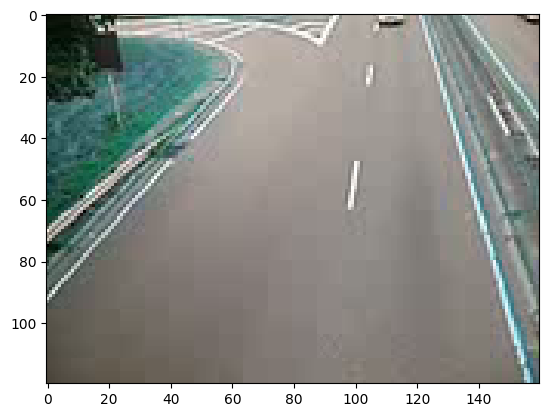

In [21]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/CV/traffic.avi')
ret,f = cap.read() #inbuilt function to read a video
plt.imshow(f)

In [22]:
frames = []
count = 0 #will tell how many frames are stored
cap = cv2.VideoCapture('/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/CV/traffic.avi')
while True:
  ret,f = cap.read() #inbuilt function to read a video
  if f is not None:
    f = cv2.resize(f,(100,100))   #we resize, bec the original frame size is 120x150,
                                  #so we reduce it to 100x100 to reduce computational complexity
    frames.append(f)
    count = count + 1
  else:
    break

In [23]:
count

120

In [24]:
len(frames)

120

In [25]:
frames = np.array(frames)

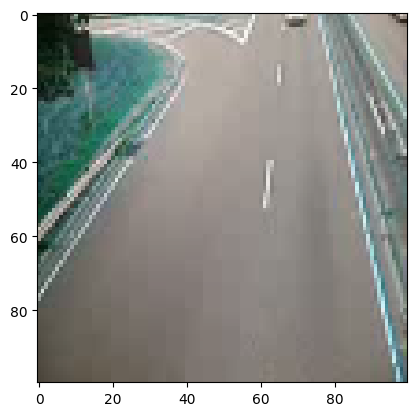

In [26]:
plt.imshow(frames[0])

## To show only background

In [40]:
sh = frames[0].shape      #sh- shape of 0th frame
row, col, ch = sh  #ch- dimension
gmm = GaussianMixture(n_components=5)
background = np.zeros((sh))

In [41]:
for i in range(row):
  for j in range(col):
    for k in range(ch):
      X = frames[:,i,j,k]
      X = X.reshape(count,1)
      gmm.fit(X)
      means = gmm.means_
      weights = gmm.weights_
      idx = np.argmax(weights)
      background[i][j][k] = int(means[idx][0])

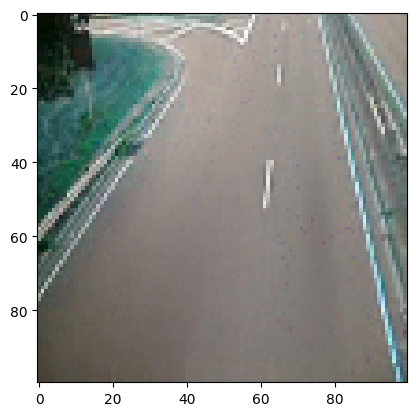

In [42]:
background = background/np.max(background)
plt.imshow(background)

##To show only Foreground

Text(0.5, 1.0, 'Foreground 100')

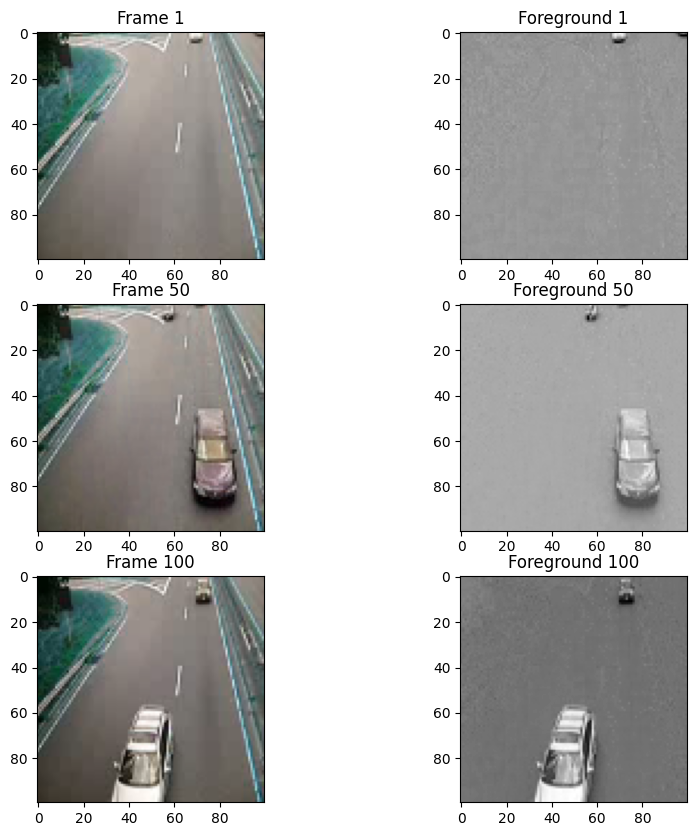

In [44]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.imshow(frames[1])
plt.title('Frame 1')

plt.subplot(3,2,2)
frame1 = frames[1]
foreground = rgb2gray(frame1) - rgb2gray(background)
plt.imshow(foreground, cmap = 'gray')
plt.title('Foreground 1')

plt.subplot(3,2,3)
plt.imshow(frames[50])
plt.title('Frame 50')

plt.subplot(3,2,4)
frame50 = frames[50]
foreground = rgb2gray(frame50) - rgb2gray(background)
plt.imshow(foreground, cmap = 'gray')
plt.title('Foreground 50')

plt.subplot(3,2,5)
plt.imshow(frames[100])
plt.title('Frame 100')

plt.subplot(3,2,6)
frame100 = frames[100]
foreground = rgb2gray(frame100) - rgb2gray(background)
plt.imshow(foreground, cmap = 'gray')
plt.title('Foreground 100')


## Conclusion:
- For the given video, at each pixel loc, GMM of 3 gaussian (n_components=3) is used to generate Background frame.
- To track the moving objects like cars, background subtraction is used.
- The results show that frame 1 , 50 and 100 show only moving cars with no background.
- If no of Gaussians for GMM is increased from 3 to 5 (n_componenets=6), the accuracy of segmenting moving objects like car improves.
- However the computational complexity increases with the increase in the no. of Gaussian Curve.